In [2]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt



Epoch 1/10


1563/1563 [==============================] - 62s 38ms/step - loss: 1.9435 - accuracy: 0.2999 - val_loss: 1.6813 - val_accuracy: 0.4056
Epoch 2/10
1563/1563 [==============================] - 58s 37ms/step - loss: 1.5497 - accuracy: 0.4464 - val_loss: 1.4328 - val_accuracy: 0.4817
Epoch 3/10
1563/1563 [==============================] - 57s 36ms/step - loss: 1.3803 - accuracy: 0.5097 - val_loss: 1.3733 - val_accuracy: 0.5157
Epoch 4/10
1563/1563 [==============================] - 80s 51ms/step - loss: 1.2757 - accuracy: 0.5518 - val_loss: 1.2141 - val_accuracy: 0.5721
Epoch 5/10
1563/1563 [==============================] - 123s 78ms/step - loss: 1.1937 - accuracy: 0.5803 - val_loss: 1.2164 - val_accuracy: 0.5705
Epoch 6/10
1563/1563 [==============================] - 128s 82ms/step - loss: 1.1291 - accuracy: 0.6042 - val_loss: 1.1310 - val_accuracy: 0.6020
Epoch 7/10
1563/1563 [==============================] - 129s 83ms/step - loss: 1.0737 - accuracy: 0.6239 - val_loss: 1

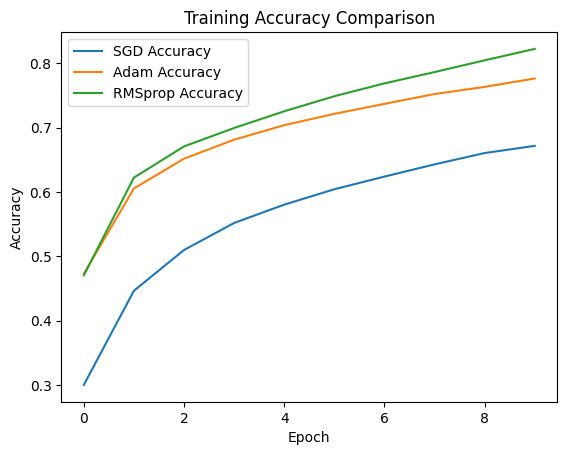

In [3]:
# Data Loading and Preprocessing
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Model Architecture
def create_cnn_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    return model

# Baseline Experiment (SGD)
model_sgd = create_cnn_model()
model_sgd.compile(optimizer=SGD(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_sgd = model_sgd.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Adam Experiment
model_adam = create_cnn_model()
model_adam.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_adam = model_adam.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# RMSprop Experiment
model_rmsprop = create_cnn_model()
model_rmsprop.compile(optimizer=RMSprop(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_rmsprop = model_rmsprop.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Comparative Analysis
plt.plot(history_sgd.history['accuracy'], label='SGD Accuracy')
plt.plot(history_adam.history['accuracy'], label='Adam Accuracy')
plt.plot(history_rmsprop.history['accuracy'], label='RMSprop Accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy Comparison')
plt.show()

# Discussion
# ... (Discuss the results and observations)

# Conclusion
# ... (Summarize key findings and conclusions)